### Ensemble Learning and Random Forests

#### Most popular Ensemble methods:
- bagging and pasting
    - Use the same training algorithm for every predictor and train them on different random subsets of the training set.
    - When sampling is performed with replacement, the method is bagging (bootstrapping aggregating). In statistics, resampling with replacement is called bootstrapping.
    - When sampling is performed without replacement, the method is pasting.
- boosting
    - Train predictors sequentially, each trying to correct its predecessor. 
    - **AdaBoost**: The algorithm then increases the relative weight of misclassified training instances. Then it trains a second classifier, using the updated weights, and again makes predictions on the training set, updates the instance weights.
    - **Gradient Boosting**: instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.
    - **XGBoost**: a scalable tree boosting system and an optimized implementation of Gradient Boosting. 
- stacking
    - instead of using trivial functions (such as hard voting) to aggregate the predictions of all predictors in an ensemble, stacking trains a model to perform this aggregation.

#### Voting Classifiers
- Hard Voting Classifiers (predict the class that gets the most votes)
- Soft Voting Classifier (predict the class based on the highest class probability, averaged over all the individual classifiers.)

#### Random Forest
- Train a group of Decision Tree classifiers, each on a different random subset of the training set.
- Instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features.
- Obtain the predictions of all the individual trees, then predict the class that gets the most votes.

#### Extra-Trees
- Extra-Trees makes trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds (like regular Decision Trees do).

#### Feature Importance
- Feature Importance calculates how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest).

## Hard Voting Classifiers (predict the class that gets the most votes)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [3]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [4]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


## Soft Voting Classifier (predict the class based on the highest class probability)

In [5]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


## Bagging, Pasting, and Out-of-Bag Evaluation in Scikit-Learn
The following code trains an ensemble of 500 Decision Tree classifiers: each is trained on 100 training instances randomly sampled from the training set with replacement.

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
bag_clf.oob_score_

0.928

In [8]:
bag_clf.oob_decision_function_

array([[0.34986945, 0.65013055],
       [0.40414508, 0.59585492],
       [1.        , 0.        ],
       [0.00763359, 0.99236641],
       [0.02631579, 0.97368421],
       [0.1184573 , 0.8815427 ],
       [0.42025316, 0.57974684],
       [0.05759162, 0.94240838],
       [0.94946809, 0.05053191],
       [0.83727034, 0.16272966],
       [0.57441253, 0.42558747],
       [0.06735751, 0.93264249],
       [0.74871795, 0.25128205],
       [0.86197917, 0.13802083],
       [0.90745501, 0.09254499],
       [0.09736842, 0.90263158],
       [0.03674541, 0.96325459],
       [0.92428198, 0.07571802],
       [0.70108696, 0.29891304],
       [0.96256684, 0.03743316],
       [0.08042895, 0.91957105],
       [0.22622108, 0.77377892],
       [0.86543536, 0.13456464],
       [0.98181818, 0.01818182],
       [0.95275591, 0.04724409],
       [0.00524934, 0.99475066],
       [0.96640827, 0.03359173],
       [1.        , 0.        ],
       [0.02857143, 0.97142857],
       [0.71794872, 0.28205128],
       [0.

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.92


In [10]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

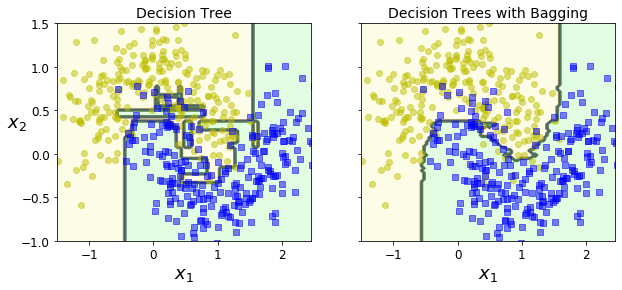

In [12]:
# To plot pretty figures
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
# save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

## Random Forests

In [13]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [14]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

## Extra-Trees

Extra-Trees makes trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds (like regular Decision Trees do).

## Feature Importance

Feature Importance calculates how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest).

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10325283428665369
sepal width (cm) 0.026866014375605315
petal length (cm) 0.43216437750034764
petal width (cm) 0.43771677383739344


## Boosting

In [16]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [17]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred)
 for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=77)

In [22]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

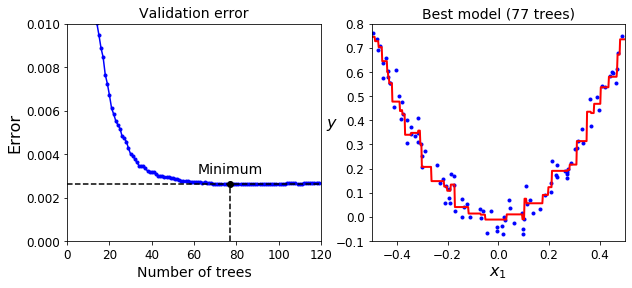

In [23]:
min_error = np.min(errors)
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

#save_fig("early_stopping_gbrt_plot")
plt.show()

In [24]:
print("Minimum validation MSE:", min_error)

Minimum validation MSE: 0.00260824820898836


In [25]:
# The following code stops training when the validation error does not improve for five iterations in a row:

In [26]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

In [27]:
print(gbrt.n_estimators)

82


In [28]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.00260824820898836


## XGBoost, a scalable tree boosting system.

In [29]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

xgb_reg.fit(X_train, y_train, 
            eval_set=[(X_val, y_val)], early_stopping_rounds=2)

y_pred = xgb_reg.predict(X_val)

[10:30:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:30:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.308708
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.281121
[2]	validation_0-rmse:0.257673
[3]	validation_0-rmse:0.236202
[4]	validation_0-rmse:0.217312
[5]	validation_0-rmse:0.200767
[6]	validation_0-rmse:0.185665
[7]	validation_0-rmse:0.170346
[8]	validation_0-rmse:0.15671
[9]	validation_0-rmse:0.144458
[10]	validation_0-rmse:0.133809
[11]	validation_0-rmse:0.124847
[12]	validation_0-rmse:0.115937
[13]	validation_0-rmse:0.108132
[14]	validation_0-rmse:0.101635
[15]	validation_0-rmse:0.095985
[16]	validation_0-rmse:0.091284
[17]	validation_0-rmse:0.086876
[18]	validation_0-rmse:0.082703
[19]	validation_0-rmse:0.079054
[20]	validation_0-rmse:0.075524
[21]	validation_0-rmse:0.072371
[22]	valida